# 1. import libraries


Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Please note that the code was developed on below versions of libraries
* Python version -- 3.8
* Pandas version -- 1.4.2
* NumPy version -- 1.21.5
* Matplotlib -- 1.4.2
* stats models -- 0.13.2
* SciPy -- 1.4.2
* sklearn -- 1.0.2
* ##### If there is any error while running the code, please check the library version and install require version

In [2]:
print("Pandas Version: ", pd. __version__)
print("Numpy Version: ", np. __version__)
print("Statsmodels Version: ", sm. __version__)
print("Scipy Version: ", pd. __version__)
print("sklearn Version: ", sklearn. __version__)
print("matplotlib Version: ", pd. __version__)

Pandas Version:  1.4.2
Numpy Version:  1.21.5
Statsmodels Version:  0.13.2
Scipy Version:  1.4.2
sklearn Version:  1.0.2
matplotlib Version:  1.4.2


In [3]:
# This command show all the rows and columns in dataframe
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Read data from csv/excel/server based on availability
This code reads data from csv

In [4]:
data = pd.read_csv(r'D:\fraud_data.csv')

# This will show top 5 rows of dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### Objective:
This model is developed to predict the real transactions fraud and the fraud estimated based on certain characteristics so that the organization can identify suspicious events and report to prevent fraud before it happens.
#### We will evaluate model performance with the:
*	F beta score
*	ROC AUC score
*	PR AUC score | Average precision

### Data information:
* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of recipient after the transaction
* isFraud: fraud transaction

# 2. Data Review and Checks

In [5]:
data.shape

(1009827, 10)

* This dataset has 10 columns and 6351193 rows

In [6]:
num_col= list(data.select_dtypes(np.number))
print("Numeric_Columns:",  num_col)
cat_col= list(data.select_dtypes(include= 'object'))
print("Categorical_Columns:", cat_col)

Numeric_Columns: ['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
Categorical_Columns: ['type', 'nameOrig', 'nameDest']


* There are 7 numeric columns and 3 are categorical columns in datset.

In [7]:
# It will provide count of non-Null and data type(int/float/object) for each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009827 entries, 0 to 1009826
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1009827 non-null  int64  
 1   type            1009827 non-null  object 
 2   amount          1009827 non-null  float64
 3   nameOrig        1009827 non-null  object 
 4   oldbalanceOrig  1009827 non-null  float64
 5   newbalanceOrig  1009827 non-null  float64
 6   nameDest        1009827 non-null  object 
 7   oldbalanceDest  1009827 non-null  float64
 8   newbalanceDest  1009827 non-null  float64
 9   isFraud         1009827 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 77.0+ MB


## 2.1 Descriptive statistics


In [8]:
# To describe numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,1009827.0,2.535658e+01,1.275139e+01,1.0,14.000,20.00,38.000,46.00
amount,1009827.0,1.597687e+05,2.591871e+05,0.1,12645.705,78956.34,215997.045,10000000.00
oldbalanceOrig,1009827.0,8.778865e+05,2.986763e+06,0.0,0.000,15948.00,138730.875,38939424.03
newbalanceOrig,1009827.0,8.984926e+05,3.023617e+06,0.0,0.000,0.00,178565.245,38946233.02
oldbalanceDest,1009827.0,9.845629e+05,2.303794e+06,0.0,0.000,133684.41,925074.600,42054659.73
newbalanceDest,1009827.0,1.123355e+06,2.424419e+06,0.0,0.000,228355.50,1164655.760,42169156.09
isFraud,1009827.0,5.377159e-04,2.318248e-02,0.0,0.000,0.00,0.000,1.00


## 2.2 Duplicates data

In [9]:
data.duplicated().sum()

0

* In this dataset no duplicate values present

### Train test split
* The data is divided into two parts train and test
* We will develop our model on train data and test the model using test data
* Developed model should be able to predict expenses in test data with same accuracy
* #### Please note that train test split should be done before any outlier treatment and missing value imputation. The same process should be followed for test data.

In [10]:
x= data.drop('isFraud', axis=1) # Drop Target variable (isFraud)
y= data['isFraud']

# 70% of data is randomly selected for train and 30% kept for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [11]:
data0= pd.concat([x_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

## 2.3 Exploratory data analysis

CASH_OUT    256067
PAYMENT     233880
CASH_IN     154119
TRANSFER     58207
DEBIT         4605
Name: type, dtype: int64


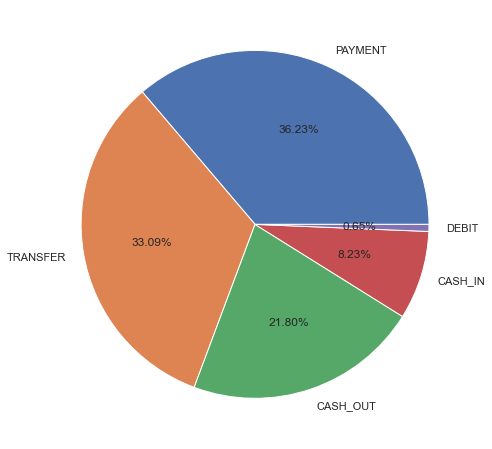

In [12]:
fig= plt.figure(figsize=(8,8))
print(data0['type'].value_counts())
plt.pie(data0['type'].value_counts(), labels=data0['type'].unique(), autopct='%1.2f%%')
plt.show()

* There the most type of transaction are cash_out, cash_in and payment.

0    706507
1       371
Name: isFraud, dtype: int64
Yes precentage for Fraud: 0.001


<AxesSubplot:xlabel='isFraud', ylabel='count'>

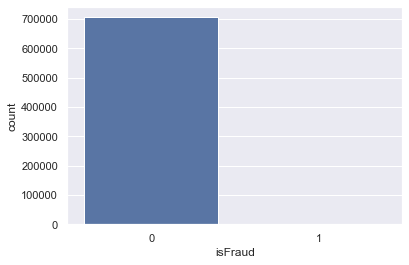

In [13]:
print(data0['isFraud'].value_counts())
print("Yes precentage for Fraud:", np.round(data0[data0['isFraud']==1].shape[0]/data0.shape[0],3))
sns.countplot(data0['isFraud'], label='IsFraud')

* In this dataset fraud cases are less that is good for organization.

Text(0, 0.5, 'Fraud count by step')

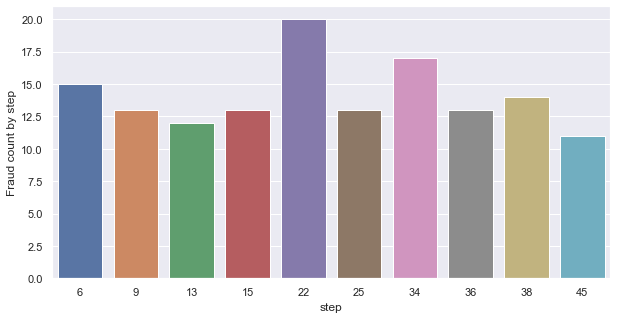

In [14]:
# Top 10 step number that fraud occured
t=pd.DataFrame(data0.groupby(by=data0['step'])['isFraud'].sum())
t2=t.sort_values(by='isFraud', ascending=False).head(10)
t2 = t2.rename_axis('step').reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=t2,x='step', y='isFraud')
plt.ylabel('Fraud count by step')

<AxesSubplot:xlabel='type', ylabel='count'>

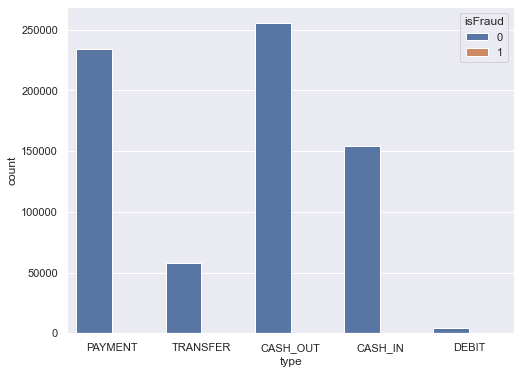

In [15]:
fig= plt.figure(figsize=(8,6))
sns.countplot(data=data0,x='type',hue='isFraud')

* There the most type of transaction caused fraud  are cash_out, payment and cash_in.

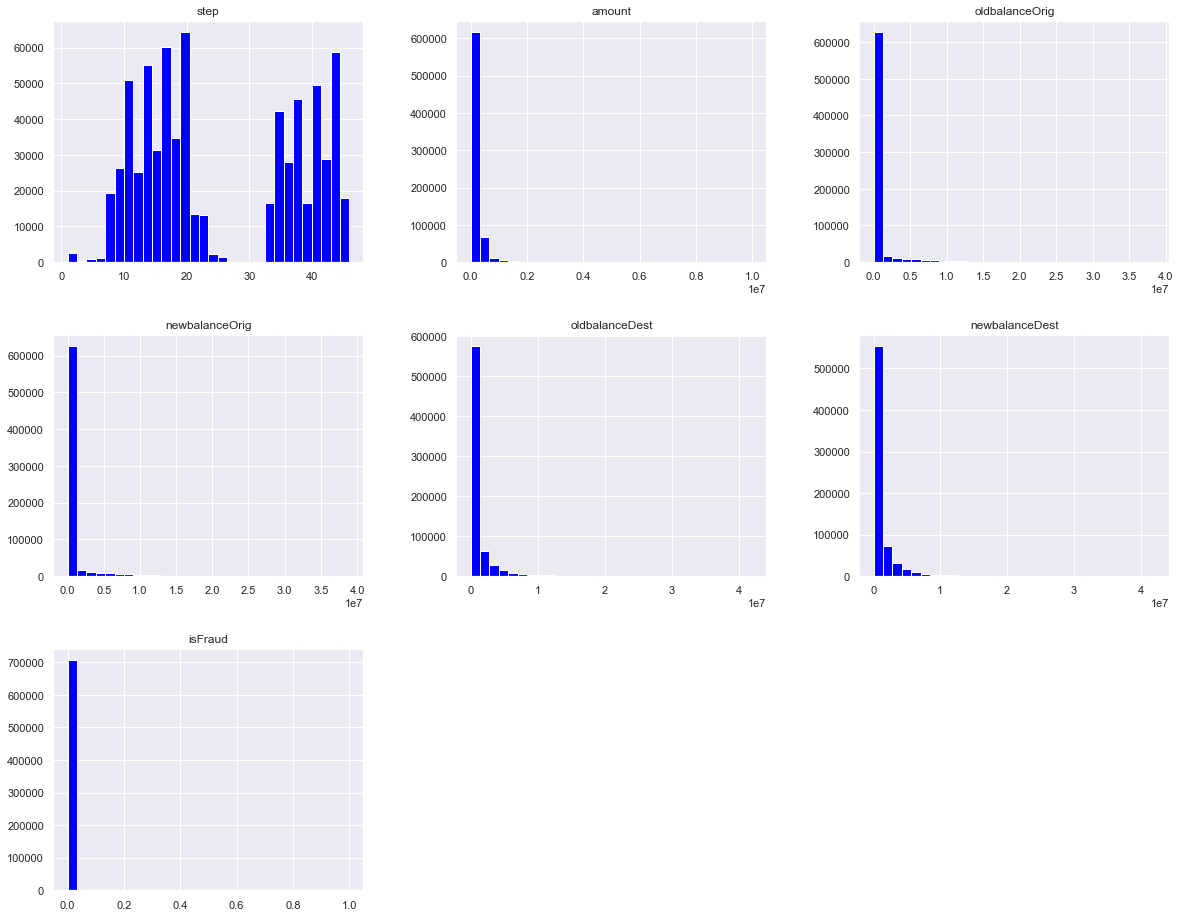

In [16]:
# numeric columns disribution 
%matplotlib inline
data0.hist(bins = 30, figsize=(20,16), color = 'blue') 
plt.show()

## 2.4 Null Check

In [17]:
# To count missing values for each variable
data0.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

* There is no null count is this dataset

## 2.5 Outlier Handling

* Only in continuous variables
####  Check the skewness of the data


* If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.


* If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.


* If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

In [18]:
skew= data0.skew().sort_values()
skew_df= pd.DataFrame({'skew':skew})
skew_df

,skew
step,0.196063
newbalanceDest,4.996493
newbalanceOrig,5.050147
oldbalanceOrig,5.114813
oldbalanceDest,5.360872
amount,5.415347
isFraud,43.615824


In [19]:
skew_df[(skew_df['skew']>=1) |(skew_df['skew']<=-1) ].index

Index(['newbalanceDest', 'newbalanceOrig', 'oldbalanceOrig', 'oldbalanceDest',
       'amount', 'isFraud'],
      dtype='object')

* #### Our Data is Highly skewed , we should correct it before modeling

<AxesSubplot:xlabel='amount', ylabel='Density'>

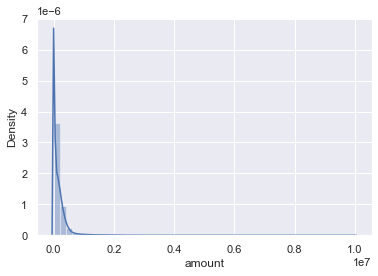

In [20]:
sns.distplot(data0['amount'])

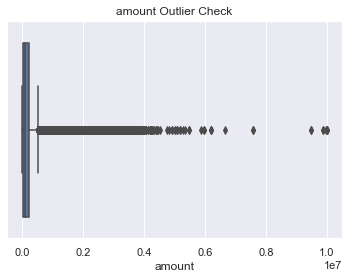

In [21]:
## Box plot --> it is ploted using quntile and inter quntile range(IQR)
## Data outside the vertical lines are considered as outliers
sns.boxplot(x=data0['amount'])
plt.title('amount Outlier Check')
plt.show()

In [22]:
Qntl1 = data0['amount'].quantile(0.25) 
Qntl3 = data0['amount'].quantile(0.75)  
IQR = Qntl3 -Qntl1
lw_amount= Qntl1 - 1.5* IQR
up_amount = Qntl3 + 1.5* IQR
print("Upper bound:",up_amount, "Lower bound:", lw_amount)

data0['amount'] = np.where(data0['amount']> up_amount, up_amount, data0['amount'])

data0['amount'] = np.where(data0['amount']< lw_amount, lw_amount, data0['amount'])

Upper bound: 521013.25125 Lower bound: -292354.71875


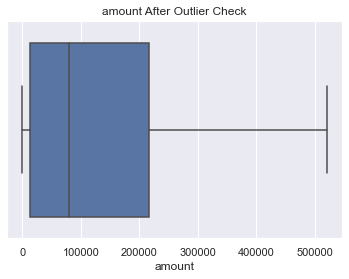

In [23]:
sns.boxplot(x=data0['amount'])
plt.title('amount After Outlier Check')
plt.show()

In [24]:
print("Skewness after outlier treatment:", data0['amount'].skew())

Skewness after outlier treatment: 1.1727930984546655


* #### We go from highly skewed to moderated data

<AxesSubplot:xlabel='oldbalanceDest', ylabel='Density'>

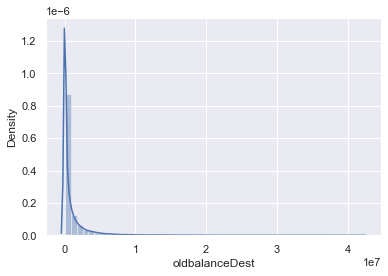

In [25]:
sns.distplot(data0['oldbalanceDest'])

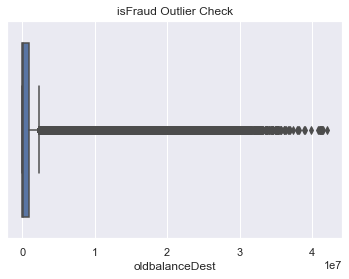

In [26]:
sns.boxplot(x=data0['oldbalanceDest'])
plt.title('isFraud Outlier Check')
plt.show()

In [27]:
Qntl1 = data0['oldbalanceDest'].quantile(0.25) 
Qntl3 = data0['oldbalanceDest'].quantile(0.75)  
IQR = Qntl3 -Qntl1
lw_limit= Qntl1 - 1.5* IQR
up_limit = Qntl3 + 1.5* IQR
print("Upper bound:",up_limit, "Lower bound:", lw_limit)

data0['oldbalanceDest'] = np.where(data0['oldbalanceDest']> up_limit, up_limit, data0['oldbalanceDest'])

data0['oldbalanceDest'] = np.where(data0['oldbalanceDest']< lw_limit, lw_limit, data0['oldbalanceDest'])

Upper bound: 2310327.93125 Lower bound: -1386196.75875


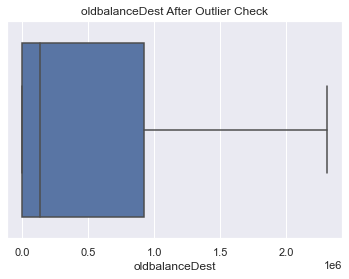

In [28]:
sns.boxplot(x=data0['oldbalanceDest'])
plt.title('oldbalanceDest After Outlier Check')
plt.show()

In [29]:
print("Skewness after outlier treatment:",data0['oldbalanceDest'].skew())

Skewness after outlier treatment: 1.2233077647949162


* #### We go from highly skewed to moderated data

<AxesSubplot:xlabel='newbalanceDest', ylabel='Density'>

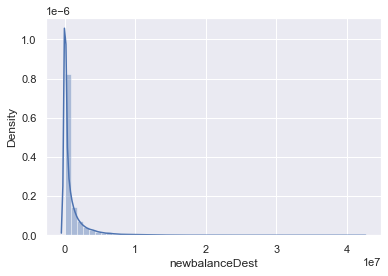

In [30]:
sns.distplot(data0['newbalanceDest'])

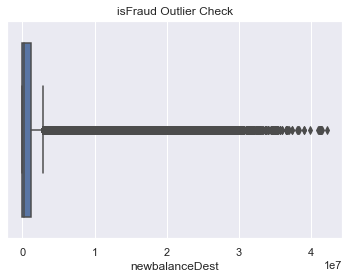

In [31]:
sns.boxplot(x=data0['newbalanceDest'])
plt.title('isFraud Outlier Check')
plt.show()

In [32]:
Qntl1 = data0['newbalanceDest'].quantile(0.25) 
Qntl3 = data0['newbalanceDest'].quantile(0.75)  
IQR = Qntl3 -Qntl1
lw_newbalanceDest= Qntl1 - 1.5* IQR
up_newbalanceDest = Qntl3 + 1.5* IQR
print("Upper bound:",up_newbalanceDest, "Lower bound:", lw_newbalanceDest)

data0['newbalanceDest'] = np.where(data0['newbalanceDest']> up_newbalanceDest, up_newbalanceDest, data0['newbalanceDest'])

data0['newbalanceDest'] = np.where(data0['newbalanceDest']< lw_newbalanceDest, lw_newbalanceDest, data0['newbalanceDest'])

Upper bound: 2909679.3062499994 Lower bound: -1745807.5837499998


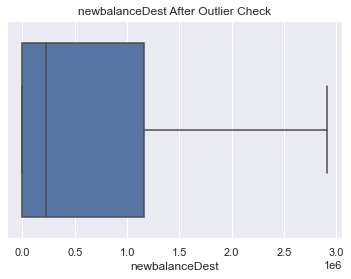

In [33]:
sns.boxplot(x=data0['newbalanceDest'])
plt.title('newbalanceDest After Outlier Check')
plt.show()

In [34]:
print("Skewness after outlier treatment:",data0['newbalanceDest'].skew())

Skewness after outlier treatment: 1.2291348165530023


* #### We go from highly skewed to moderated data

<AxesSubplot:xlabel='oldbalanceOrig', ylabel='Density'>

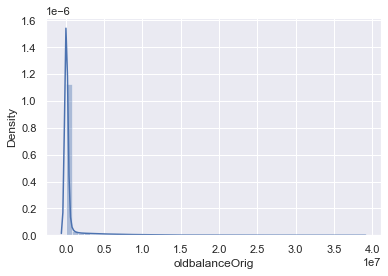

In [35]:
sns.distplot(data0['oldbalanceOrig'])

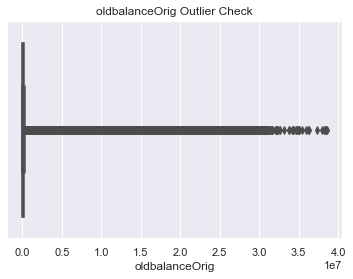

In [36]:
sns.boxplot(x=data0['oldbalanceOrig'])
plt.title('oldbalanceOrig Outlier Check')
plt.show()

In [37]:
Qntl1 = data0['oldbalanceOrig'].quantile(0.25) 
Qntl3 = data0['oldbalanceOrig'].quantile(0.75)  
IQR = Qntl3 -Qntl1
lw_oldbalanceOrig= Qntl1 - 1.5* IQR
up_oldbalanceOrig = Qntl3 + 1.5* IQR
print("Upper bound:",up_oldbalanceOrig, "Lower bound:", lw_oldbalanceOrig)

data0['oldbalanceOrig'] = np.where(data0['oldbalanceOrig']> up_oldbalanceOrig, up_oldbalanceOrig, data0['oldbalanceOrig'])

data0['oldbalanceOrig'] = np.where(data0['oldbalanceOrig']< lw_oldbalanceOrig, lw_oldbalanceOrig, data0['oldbalanceOrig'])

Upper bound: 345608.775 Lower bound: -207365.265


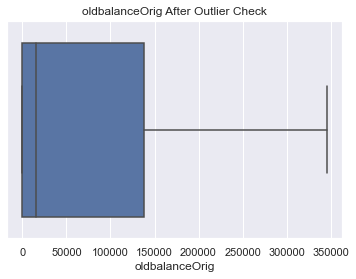

In [38]:
sns.boxplot(x=data0['oldbalanceOrig'])
plt.title('oldbalanceOrig After Outlier Check')
plt.show()

In [39]:
print("Skewness after outlier treatment:",data0['oldbalanceOrig'].skew())

Skewness after outlier treatment: 1.1897488528312505


* #### We go from highly skewed to moderated data

<AxesSubplot:xlabel='newbalanceOrig', ylabel='Density'>

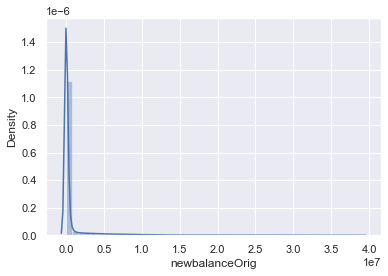

In [40]:
sns.distplot(data0['newbalanceOrig'])

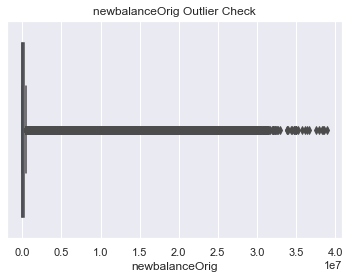

In [41]:
sns.boxplot(x=data0['newbalanceOrig'])
plt.title('newbalanceOrig Outlier Check')
plt.show()

In [42]:
Qntl1 = data0['newbalanceOrig'].quantile(0.25) 
Qntl3 = data0['newbalanceOrig'].quantile(0.75)  
IQR = Qntl3 -Qntl1
lw_newbalanceOrig= Qntl1 - 1.5* IQR
up_newbalanceOrig = Qntl3 + 1.5* IQR
print("Upper bound:",up_newbalanceOrig, "Lower bound:", lw_newbalanceOrig)

data0['newbalanceOrig'] = np.where(data0['newbalanceOrig']> up_newbalanceOrig, up_newbalanceOrig, data0['newbalanceOrig'])

data0['newbalanceOrig'] = np.where(data0['newbalanceOrig']< lw_newbalanceOrig, lw_newbalanceOrig, data0['newbalanceOrig'])

Upper bound: 445504.93125 Lower bound: -267302.95875


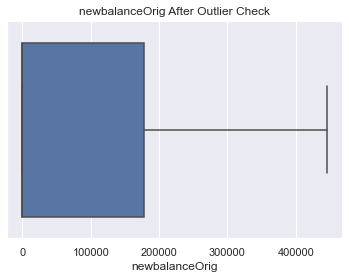

In [43]:
sns.boxplot(x=data0['newbalanceOrig'])
plt.title('newbalanceOrig After Outlier Check') 
plt.show()

In [44]:
print("Skewness after outlier treatment:",data0['newbalanceOrig'].skew()) 

Skewness after outlier treatment: 1.2307585994254728


* #### We go from highly skewed to moderated data

## 2.6 Correlation between all numerical variables

In [45]:
# Correlation
data0.corr().style.background_gradient (cmap='binary')

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.010810,-0.041906,-0.036220,0.023661,-0.001032,-0.002099
amount,-0.010810,1.000000,0.001910,0.021371,0.396573,0.483070,0.022430
oldbalanceOrig,-0.041906,0.001910,1.000000,0.885947,0.096748,0.027761,0.019598
newbalanceOrig,-0.036220,0.021371,0.885947,1.000000,0.107712,0.005303,-0.014187
oldbalanceDest,0.023661,0.396573,0.096748,0.107712,1.000000,0.952743,-0.008260
newbalanceDest,-0.001032,0.483070,0.027761,0.005303,0.952743,1.000000,-0.002366
isFraud,-0.002099,0.022430,0.019598,-0.014187,-0.008260,-0.002366,1.000000


## 2.7 Covert categorical to numeric

In [46]:
cat_col

['type', 'nameOrig', 'nameDest']

In [47]:
data0['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'CASH_IN', 'DEBIT'],
      dtype=object)

In [48]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'type'.
data0['type']= label_encoder.fit_transform(data0['type'])
  
data0['type'].unique()

array([3, 4, 1, 0, 2])

#### Let's find the Frequency of each unique categorical values of feature "nameOrig"

In [49]:
enc_nameOrig= (data0.groupby('nameOrig').size()) 
#enc_nameOrig

In [50]:
data0['nameOrig_encode'] = data0['nameOrig'].apply(lambda x : enc_nameOrig[x])

#### Let's find the Frequency of each unique categorical values of feature "nameDest"

In [51]:
enc_nameDest= (data0.groupby('nameDest').size()) 
#enc_nameDest

In [52]:
data0['nameDest_encode'] = data0['nameDest'].apply(lambda x : enc_nameDest[x])


### Information value and WOE

In [53]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [54]:
temp0 = data0.drop(['nameOrig', 'nameDest'], axis=1)

In [55]:
a = iv_woe(temp0, 'isFraud', bins=10, show_woe=False)
df_IV = a[0]
df_woe = a[1]

Information value of step is 0.514532
Information value of type is 3.700355
Information value of amount is 0.836821
Information value of oldbalanceOrig is 0.842558
Information value of newbalanceOrig is 1.663662
Information value of oldbalanceDest is 0.27596
Information value of newbalanceDest is 0.087312
Information value of nameOrig_encode is 0.001402
Information value of nameDest_encode is 0.055562


In [56]:
df_IV = df_IV.sort_values(by=['IV'])
df_IV

,Variable,IV
0,nameOrig_encode,0.001402
0,nameDest_encode,0.055562
0,newbalanceDest,0.087312
0,oldbalanceDest,0.275960
0,step,0.514532
0,amount,0.836821
0,oldbalanceOrig,0.842558
0,newbalanceOrig,1.663662
0,type,3.700355


In [57]:
df_train = temp0.drop(['nameOrig_encode', 'nameDest_encode'], axis=1)

### Checking VIF

In [58]:
## VIF
x = df_train.drop(['isFraud'], axis=1)
df_vif= pd.DataFrame()
df_vif['Variable'] = x.columns
df_vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
df_vif = df_vif.sort_values('VIF')
df_vif.reset_index(drop=True, inplace =True)
df_vif

,Variable,VIF
0,type,2.260139
1,amount,2.458154
2,step,3.036950
3,oldbalanceOrig,7.414266
4,newbalanceOrig,7.882899
5,oldbalanceDest,21.362731
6,newbalanceDest,23.445370


#### newbalanceDes column has high VIF, so need to drop it

In [59]:
## VIF
x = df_train.drop(['isFraud', 'newbalanceDest'], axis=1)
df_vif= pd.DataFrame()
df_vif['Variable'] = x.columns
df_vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
df_vif = df_vif.sort_values('VIF')
df_vif.reset_index(drop=True, inplace =True)
df_vif

,Variable,VIF
0,oldbalanceDest,1.838420
1,amount,2.014354
2,type,2.216234
3,step,3.005722
4,oldbalanceOrig,7.196799
5,newbalanceOrig,7.276304


* #### Now we getting VIF< 10, so there is no multicollinearity 

In [60]:
# list of independent variables use in model
ind_var = df_vif['Variable'].to_list()
ind_var

['oldbalanceDest',
 'amount',
 'type',
 'step',
 'oldbalanceOrig',
 'newbalanceOrig']

# 3. Model Developemnt

In [61]:
model= LogisticRegression()
# defining the dependent and independent variables
Xtrain = temp0[ind_var]
Xtrain = sm.add_constant(Xtrain)
ytrain = temp0[['isFraud']]

# building the model and fitting the data
log_reg = model.fit(Xtrain, ytrain)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
# predication of target variable based on train data
yhat = log_reg.predict(Xtrain)
prediction = list(map(round, yhat))

In [63]:
# confusion matrix 
confusion_matrix(ytrain, prediction)

array([[706456,     51],
       [   353,     18]], dtype=int64)

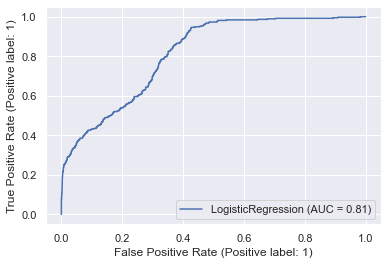

In [64]:
# reciever operating characterstics curve
plot_roc_curve(model,Xtrain,ytrain)

In [65]:
# classification report 
print(classification_report( prediction, ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    706809
           1       0.05      0.26      0.08        69

    accuracy                           1.00    706878
   macro avg       0.52      0.63      0.54    706878
weighted avg       1.00      1.00      1.00    706878



###  Performance check on test data

In [66]:
data0= pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
data0.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,45,TRANSFER,255078.28,C1486558577,0.00,0.00,C1158064761,626244.24,881322.52,0
1,14,PAYMENT,9556.60,C1712461654,200835.82,191279.22,M349311,0.00,0.00,0
2,37,CASH_OUT,157209.11,C58057354,0.00,0.00,C655035728,231878.20,389087.31,0
3,18,CASH_OUT,168316.56,C1523285187,21398.00,0.00,C1103647694,0.00,446648.85,0
4,44,PAYMENT,11562.41,C1222719612,41935.00,30372.59,M1077753894,0.00,0.00,0


In [67]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'type'.
data0['type']= label_encoder.fit_transform(data0['type'])
  
data0['type'].unique()

array([4, 3, 1, 0, 2])

In [68]:
# defining the dependent and independent variables
Xtest = data0[ind_var]
Xtest = sm.add_constant(Xtest)
ytest = data0[['isFraud']]

In [69]:
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))

In [70]:
confusion_matrix(ytest, prediction)

array([[302673,    104],
       [   124,     48]], dtype=int64)

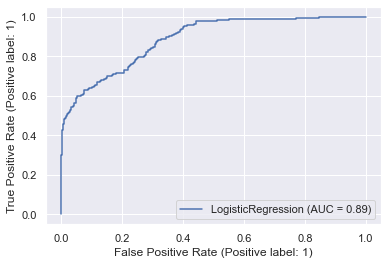

In [71]:
plot_roc_curve(model,Xtest,ytest)

In [72]:
print(classification_report( prediction, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    302797
           1       0.28      0.32      0.30       152

    accuracy                           1.00    302949
   macro avg       0.64      0.66      0.65    302949
weighted avg       1.00      1.00      1.00    302949

